In [1]:
#### 1.loading_data.R 
### 1)Read cluster resaults
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
hclust.Res <- Cluster.20200201.V7.Tumor$hclust.Res
### 2)GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing
## Comparative_Molecular_Analysis_of_Gastrointestinal_Adenocarcinomas
file1 <- "/data8t_4/JH/MyJobs/Read_dataset/TCGA_PanCancerAtlas_Publications/Comparative_Molecular_Analysis_of_Gastrointestinal_Adenocarcinomas/COAD_GI_Adenocarcinomas_Characteristics_And_Epigenetic_Silencing_dataset.rds"
COAD_GI_Adenocarcinomas_dataset <- readRDS(file1)
COAD.GI.Adenocarcinomas.Characteristics <- COAD_GI_Adenocarcinomas_dataset$COAD.GI.Adenocarcinomas.Characteristics
COAD.Epigenetic.Silencing.Calls <- COAD_GI_Adenocarcinomas_dataset$COAD.Epigenetic.Silencing.Calls


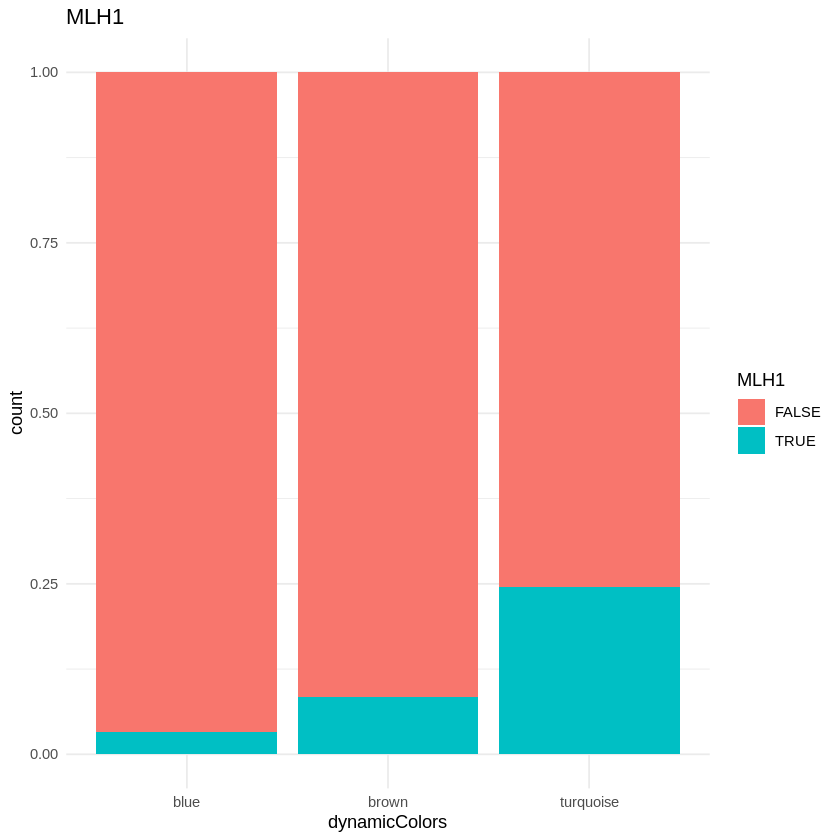

In [3]:
################## 2.GI_Adenocarcinomas_COAD.Epigenetic.Silencing.Calls #####################
library(ggplot2)
#COAD.Epigenetic.Silencing.Calls
#COAD.Epigenetic.Silencing.Calls[1:5,1:5]
### 1)Building plot table
Gene = "MLH1"
gene_tb <- COAD.Epigenetic.Silencing.Calls[Gene,]
gene_tb <- as.data.frame(t(gene_tb))
gene_tb$rownames <- rownames(gene_tb)
### 2)merge
Plot.df.gene <- dplyr::left_join(Cluster.df, gene_tb, by = "rownames")
#colnames(Plot.df.gene)
data=subset(Plot.df.gene, !is.na(Plot.df.gene[,Gene]))
p <- ggplot(data, aes(x = dynamicColors, fill = data[,Gene])) + 
  geom_bar(position = "fill") + theme_minimal()+ scale_fill_discrete(name =Gene)+
  labs(title =Gene)
print(p)